Modul 1: Histogram dan Konvolusi


Soal 1,

"Berdasarkan gambar berikut, munculkanlah diagram dan nilai histogram skala warnanya berdasarkan probabilitas piksel, dan jumlah warna keabuan"

In [2]:
import matplotlib.pyplot as plt
# menambahkan library matplotlib.pyplot untuk digunakan dalam visualisasi data
import cv2
# menambahkan library cv2 yang berfungsi untuk pengolahan sebuah citra
import numpy as np
# menambahkan library numpy untuk proses matematika yang dilakukan dalam pengolahan citra


[[[170 185 206]
  [170 185 206]
  [172 185 204]
  ...
  [174 191 207]
  [174 191 207]
  [173 190 206]]

 [[169 184 205]
  [169 184 205]
  [171 184 203]
  ...
  [175 192 208]
  [174 191 207]
  [173 190 206]]

 [[169 184 205]
  [169 184 205]
  [170 183 202]
  ...
  [175 192 208]
  [175 192 208]
  [174 191 207]]

 ...

 [[ 87  79  68]
  [ 87  79  68]
  [ 89  81  70]
  ...
  [137 119  95]
  [136 119  93]
  [136 119  93]]

 [[ 85  77  66]
  [ 86  78  67]
  [ 88  80  69]
  ...
  [134 117  91]
  [134 117  91]
  [136 116  91]]

 [[ 85  77  66]
  [ 86  78  67]
  [ 87  79  68]
  ...
  [132 115  89]
  [132 115  89]
  [134 114  87]]]


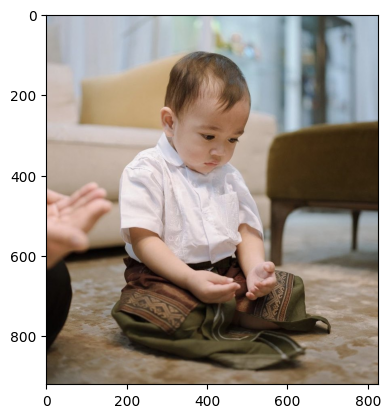

In [3]:
gambar = plt.imread("cipung.jpg")
# menyimpan sebuah citra cipung.jpg kedalam variabel gambar untuk mempermudah pengolahan citra
print(gambar)
# menampilkan nilai array yang terdapat pada variabel gambar
plt.imshow(gambar)
# menampilkan tampilan citra dari varibel gambar

[[190 190 189 ... 194 194 193]
 [189 189 188 ... 195 194 193]
 [189 189 187 ... 195 195 194]
 ...
 [ 77  77  79 ... 114 113 113]
 [ 75  76  78 ... 111 111 111]
 [ 75  76  77 ... 109 109 108]]


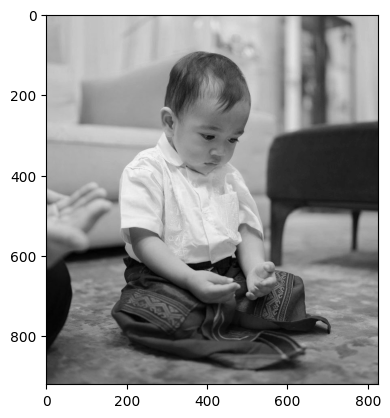

In [4]:
abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
# membuat variabel baru bernama "abu" untuk menyimpan citra pada variabel gambar yang telah diolah dimensi warnanya dari RGB ke GRAY
print(abu)
plt.imshow(abu, cmap='gray')
# menampilkan array variabel "abu" serta menampilkan tampilan citra dengan colormap gray
tinggi, lebar = abu.shape
abu.shape
# membuat vaiabel tinggi dan lebar serta memasukan nilai kedua variabel dengan bantuan ".shape", serta menampilkan ukuran pixel dari sebuah citra"
sumGray = np.zeros(256)
for x in range (tinggi):
    for y in range(lebar):
        nilai = abu[x,y]
        sumGray[nilai] += 1
    # melakukan pengulangan untuk menambahkan nilai 1 pada masing masing pixel pada sebuah citra, gunannya agar dapat merubah citra bernilai 2 dimensi menjadi 1 dimensi"
grayvalue = [i for i in range(256)]
# membuat variabel grayvalue untuk mempermudah tampilan dalam histogram"

<BarContainer object of 256 artists>

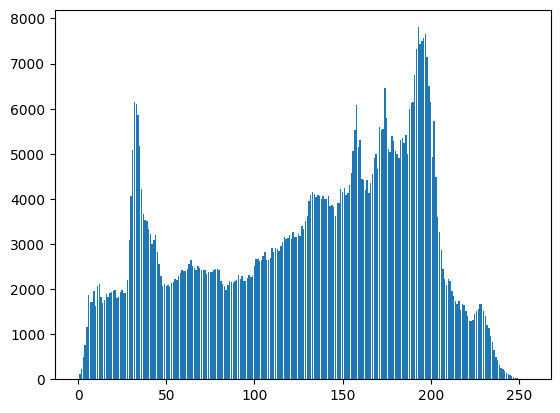

In [5]:
plt.bar(grayvalue, sumGray)
#menampilkan jumlah derajat keabuan yang ada pada citra

<BarContainer object of 256 artists>

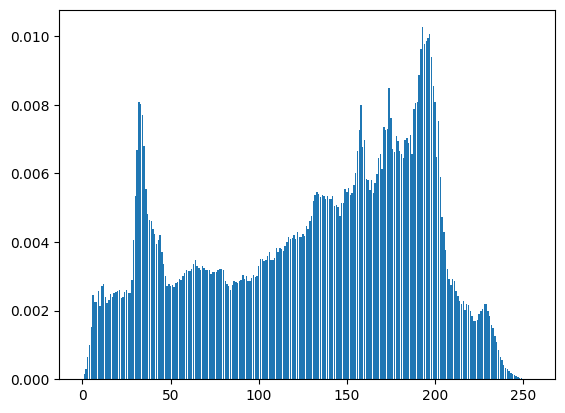

In [6]:
plt.bar(grayvalue, sumGray/(tinggi*lebar))
# menampilkan probabilitas derajat keabuan yang ada pada citra

Soal 2

Lakukanlah konvolusi pada citra dengan zero padding dan tanpa padding dengan kernel berikut

    [ 0, 0,-1, 1]
    [ 0, 2, 1,-1]
    [-1, 1, 2, 0]
    [ 1,-1, 0, 0]
    
Kemudian tampilkan gambar dan nilai hasil konvolusi tanpa proses clipping, dan dengan proses clipping

In [7]:
kernel = [[ 0, 0,-1, 1],
          [ 0, 2, 1,-1],
          [-1, 1, 2, 0],
          [ 1,-1, 0, 0]]
# membuat variabel kernel untuk digunakan dalam konvolusi"

ZERO PADDING

[[ 753.  749.  750. ...  777.  386.    0.]
 [ 751.  746.  747. ...  779.  388.    0.]
 [ 746.  742.  746. ...  777.  388.    0.]
 ...
 [ 307.  315.  318. ...  436.  221. -108.]
 [ 151.  154.  158. ...  215.  216.    0.]
 [   2.    0.    1. ... -108.    0.    0.]]


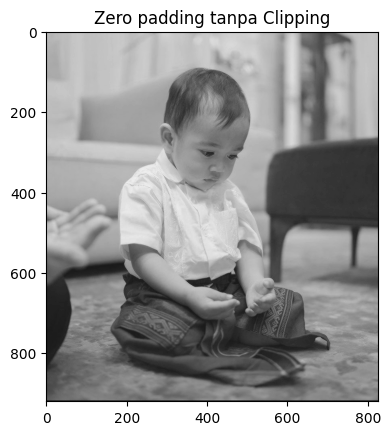

In [8]:
image_pad = np.pad(abu, [(0,3), (0,3)]).astype(int)
image_pad
#membuat variabel image_pad dengan isi di dalamnya berupa citra "abu" yang telah ditambahkan zero padding untuk melakukan konvolusi, serta menampilkan array dari variabel image_pad "
zeropadimage = np.zeros(abu.shape)
# membuat sebuah variabel zeropadimage sebagai tempat/wadah untuk hasil konvolusi"
# pengulangan di bawah merupakan proses konvolusi sebuah citra dengan kernel berukuran 4 kali 4, proses dilakukan berulangkali sebanyak pixel yang terdapat pada citra\n",
for x in range(tinggi):
    for y in range(lebar):
        zeropadimage[x][y] = kernel[0][0]*image_pad[x][y] + kernel[1][0]*image_pad[x+1][y] + kernel[2][0]*image_pad[x+2][y] + kernel[3][0]*image_pad[x+3][y] + kernel[0][1]*image_pad[x][y+1] + kernel[1][1]*image_pad[x+1][y+1] + kernel[2][1]*image_pad[x+2][y+1] + kernel[3][1]*image_pad[x+3][y+1] + kernel[0][2]*image_pad[x][y+2] + kernel[1][2]*image_pad[x+1][y+2] + kernel[2][2]*image_pad[x+2][y+2] + kernel[3][2]*image_pad[x+3][y+2] + kernel[0][3]*image_pad[x][y+3] + kernel[1][3]*image_pad[x+1][y+3] + kernel[2][3]*image_pad[x+2][y+3] + kernel[3][3]*image_pad[x+3][y+3]

plt.title("Zero padding tanpa Clipping")
print(zeropadimage)
plt.imshow(zeropadimage, cmap='gray')
# menampilkan array serta tampilan citra dari hasil konvolusi"

<BarContainer object of 256 artists>

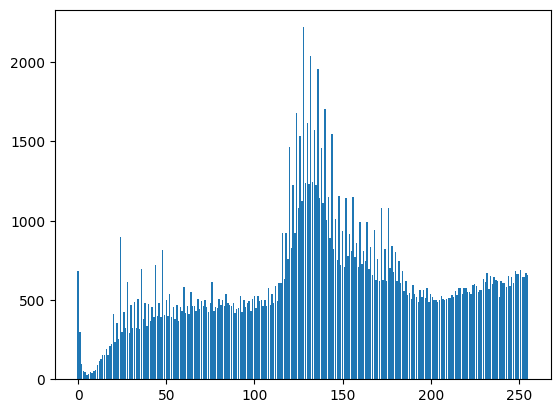

In [9]:
histo_zp = cv2.calcHist([zeropadimage.astype(np.float32)],[0],None,[256],[0,256])\
# Digunakan untuk menghitung histogram dari level keabuan array zeropadimage Hasil dari perhitungan sebelumnya akan disimpan pada variabel histo_zp 
plt.bar(grayvalue, histo_zp.flatten())
# menampilkan bar dengan x nya sebagai derajat keabuan dan y nya banyaknya pixel

[[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


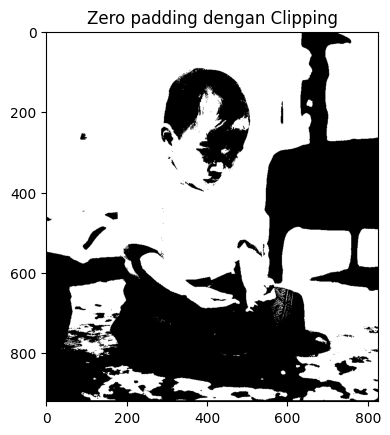

In [10]:
max_val = np.max(zeropadimage)
min_val = np.min(zeropadimage)
# mengambil nilai maksimum dan minimum dari citra zeropadimage untuk digunakan dalam rumus normalisasi
normalisasi_zp = np.round((zeropadimage - min_val)/(max_val - min_val))
# melakukan normalisasi pada tiap pixel dari citra kemudian di simpan dalam variabel normalisasi_zp
plt.title("Zero padding dengan Clipping")
print(normalisasi_zp)
plt.imshow(normalisasi_zp, cmap='gray')
# menampilkan array serta tampilan citra dari hasil normalisisai"

<BarContainer object of 256 artists>

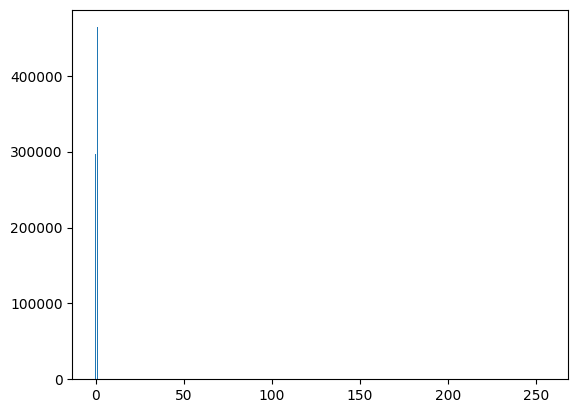

In [11]:
histo_zpc = cv2.calcHist([normalisasi_zp.astype(np.float32)],[0],None,[256],[0,256])
# Digunakan untuk menghitung histogram dari level keabuan array normalisasi_zpc Hasil dari perhitungan sebelumnya akan disimpan pada variabel histo_zpc 
plt.bar(grayvalue, histo_zpc.flatten())
# menampilkan bar dengan x nya sebagai derajat keabuan dan y nya banyaknya pixel"


TANPA PADDING

In [12]:
nopadimage = np.zeros(abu.shape)
# membuat sebuah variabel nopadimage sebagai tempat/wadah untuk hasil konvolusi

# pengulangan di bawah merupakan proses konvolusi sebuah citra dengan kernel berukuran 4 kali 4, proses dilakukan berulangkali sebanyak pixel yang terdapat pada citra\n",
for a in range(tinggi-3):
    for b in range(lebar-3):
        nopadimage[a][b] = kernel[0][0]*abu[a][b] + kernel[1][0]*abu[a+1][b] + kernel[2][0]*abu[a+2][b] + kernel[3][0]*abu[a+3][b] + kernel[0][1]*abu[a][b+1] + kernel[1][1]*abu[a+1][b+1] + kernel[2][1]*abu[a+2][b+1] + kernel[3][1]*abu[a+3][b+1] + kernel[0][2]*abu[a][b+2] + kernel[1][2]*abu[a+1][b+2] + kernel[2][2]*abu[a+2][b+2] + kernel[3][2]*abu[a+3][b+2] + kernel[0][3]*abu[a][b+3] + kernel[1][3]*abu[a+1][b+3] + kernel[2][3]*abu[a+2][b+3] + kernel[3][3]*abu[a+3][b+3]

[[753. 749. 750. ...   0.   0.   0.]
 [751. 746. 747. ...   0.   0.   0.]
 [746. 742. 746. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


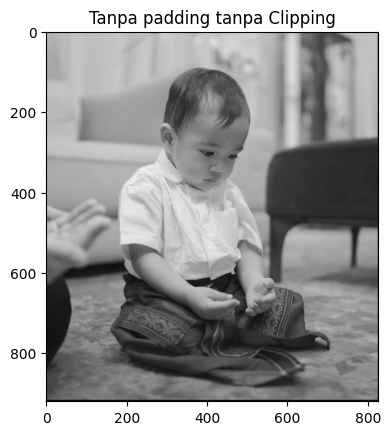

In [13]:
plt.title("Tanpa padding tanpa Clipping")
print(nopadimage)
plt.imshow(nopadimage, cmap='gray')
# menampilkan array serta tampilan citra dari hasil konvolusi sebelumnya

<BarContainer object of 256 artists>

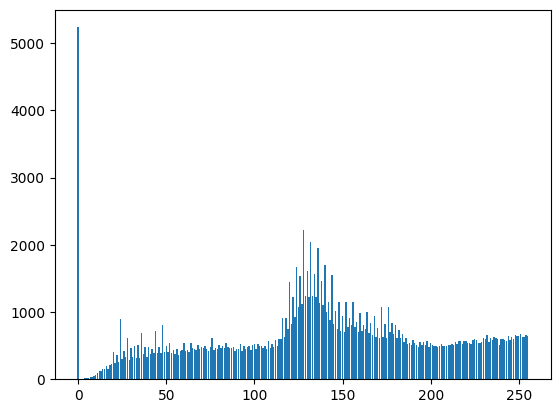

In [14]:
histo_np = cv2.calcHist([nopadimage.astype(np.float32)],[0],None,[256],[0,256])
# Digunakan untuk menghitung histogram dari level keabuan array nopadimage Hasil dari perhitungan sebelumnya akan disimpan pada variabel histo_np
plt.bar(grayvalue, histo_np.flatten())
# menampilkan bar dengan x nya sebagai derajat keabuan dan y nya banyaknya pixel

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


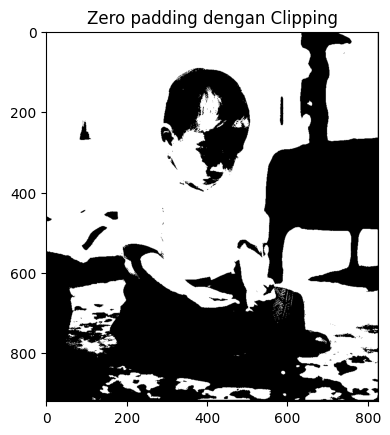

In [15]:
max_val = np.max(nopadimage)
min_val = np.min(nopadimage)
# mengambil nilai maksimum dan minimum dari citra nopadimage untuk digunakan dalam rumus normalisasi
normalisasi_npc = np.round((nopadimage - min_val)/(max_val - min_val))
#melakukan normalisasi pada tiap pixel dari citra kemudian di simpan dalam variabel normalisasi_npc
plt.title("Zero padding dengan Clipping")
print(normalisasi_npc)
plt.imshow(normalisasi_npc, cmap='gray')
# menampilkan array serta tampilan citra dari hasil normalisisai